# Virtual Radioactivity Experiment

This notebook simulates a radioactive decay experiment. You must run the cells in order - but remember that some of them need you to put numbers in. Specific instructions and questions to consider are presented in <font color="red">**red text**</font>.

This first section loads some "modules", which are bits of code that we'll need to use later on. We need to run this before we can start

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random

## Section 1 - Experimental setup

This section sets up the experiment we're going to run. These are the parameters we'll work with.

Examples of decayConstants (related to the probability of any one atom decaying in a given time period) for some isotopes. The "shorthand" format is commonly used in computing to denote scientific notation. So, for example, 3.4e-2 means $3.4 \times 10^{-2}$ (or 0.034)
 * $^{14}$C   : 3.84e-12 s$^{-1}$
 * $^{15}$C   : 2.83e-1 s$^{-1}$
 * $^{24}$Na  : 1.28e-5 s$^{-1}$
 * $^{131}$I  : 9.94e-7 s$^{-1}$
 * $^{210}$Po : 5.73e-8 s$^{-1}$
 * $^{214}$Po : 4.33 s$^{-1}$
 * $^{214}$Bi : 5.78e-4 s$^{-1}$
 * $^{218}$Po : 3.73e-3 s$^{-1}$
 * $^{222}$R  : 2.11e-6 s$^{-1}$
 * $^{226}$Ra : 1.37e-11 s$^{-1}$
 * $^{234}$Pa : 9.63e-3 s$^{-1}$
 * $^{234}$U  : 9.16e-14 s$^{-1}$
 * $^{238}$U  : 4.88e-18 s$^{-1}$
 


<p><b><font color="red">You will need to enter some numbers for it to work. If you want to change the atoms your using, you'll have to change this.</font></b></p>

In [23]:
# Enter a number of atoms to simulate in the experiment.
totalNumberOfAtoms = ENTER_NUMBER

# The chance of an individual atom decaying per second.
# Remember that this is a probability so it must be less than 1
decayConstant = ENTER_DECAY_CONSTANT

## Section 2 - Data Recording Set up

In this section we'll set up the length of time we're going to run for, and the interval between readings. Remember that this isn't run in "real time", so these can be very short or very long.

<font color="red">**If you want to re-run the experiment (with the same atoms), you'll have to re-run this cell.**</font>

In [36]:
# These blank arrays are going to be used later on.
# An array is just a list of numbers, and they are an important part of coding - especially in science!

# Enter a length for the number of seconds to run the experiment for.
# This should be an integer (i.e. a whole number)
experimentDuration = ENTER_DURATION
timeInterval = ENTER_TIME_INTERVAL

numberOfSteps=int(experimentDuration/timeInterval)
timeStepArray = np.zeros(numberOfSteps)
numberOfUndecayedAtomsArray = np.zeros(numberOfSteps)
numberOfDecayedAtomsArray = np.zeros(numberOfSteps)

# this next line sets up a "array" of the atoms - in this case one number per atom.
# The numbers all start of as 1 - which is how we record that the atoms are undecayed.
# Later, the numbers will change to 0 - which is how we record that they are decayed.
atoms = np.ones(totalNumberOfAtoms)

# Our experiment is now set up!
print('Experiment will create {} readings every {} s.'.format(numberOfSteps,timeInterval))
print('Total Duration: {} s'.format(experimentDuration))


Experiment will create 100 readings every 0.1 s.
Total Duration: 10 s)


## Section 3 - Running the experiment

In this section we'll run the experiment.

This is a for loop, and repeats the same thing again and again for as long as we need. It will step forward once per second from zero until "experimentDuration", and do the same thing every time.

You do not need to worry about what is happening here.

In [37]:
print('Experiment running...')
# First, step through the time steps
for t in range(numberOfSteps): 
    # record the time at this step
    timeStepArray[t] = t*timeInterval

    # count the number of undecayed atoms, by adding up all the numbers in the "atoms" array
    # (Remember that 1 = undecayed, 0 = decayed)
    numberOfUndecayedAtomsNow = np.sum(atoms)
    numberOfDecayedAtomsNow = totalNumberOfAtoms - numberOfUndecayedAtomsNow
    numberOfUndecayedAtomsArray[t] = numberOfUndecayedAtomsNow
    numberOfDecayedAtomsArray[t] = numberOfDecayedAtomsNow

    # At each time step, cycle through all the atoms and decide whether they're decayed
    for atom in range(totalNumberOfAtoms):
        # generate a random number between 0 and 1
        randomNumber = random.uniform(0, 1)
        
        # Decide whether the atom has decayed, and replace the 1 with 0 if it has.
        decayProbability = 1-np.exp(-decayConstant*timeInterval)
        if(randomNumber <= decayProbability):
            atoms[atom] = 0

print('Experiment complete')

Experiment running...
Experiment complete


## Section 4 - Presenting the Raw Data

The "plt." prefix here is used to create graphs and plots, and is using the pyplot package we imported at the top.

This will create a plot showing the number of undecayed atoms at each timestep, and should follow a curve.

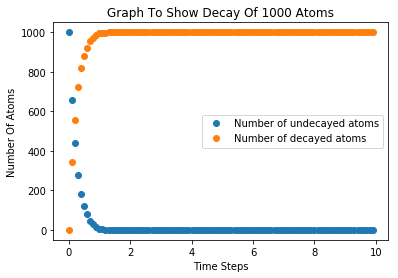

In [32]:
#This section randomly chooses a number between 0 and 1 for each atom at each timestep, and if that number is below the
#level you set earlier, the atom will decay. This should create our "half-life" decay, and we can check this by plotting
#the results on a graph
            
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Section 4 - Presenting The Raw Data

plt.figure(1)
plt.title('Graph To Show Decay Of ' + str(totalNumberOfAtoms) + ' Atoms')
plt.xlabel('Time Steps')
plt.ylabel('Number Of Atoms')

plt.plot(timeStepArray, numberOfUndecayedAtomsArray, 'o',label='Number of undecayed atoms')
plt.plot(timeStepArray, numberOfDecayedAtomsArray, 'o',label='Number of decayed atoms')
plt.legend()
plt.show()

## Section 5 - Creating the models

We can create models to compare with the data. Below are several theoretical models, all of which are characterised by the "half life" - the time it takes for half the atoms to decay. The models are:
 * **LinearDecay** - a constant decay rate
 * **InverseDecay** - the number of undecayed atoms is inversely proportional to time
 * **InverseSquareDecay** - the number of undecayed atoms is inversely proportional to the square of time
 * **QuadraticDecay** - the number of undecayed atoms is proportional to time squared
 * **ExponentialDecay** - the number of undecayed atoms decreases expontially

In [20]:
#Make a model where the same number decay every second
def LinearDecay(timeArray,HalfLife):
#     decayRate=0.5*initialAtoms/HalfLife
    expectedUndecayedAtoms = totalNumberOfAtoms*(1 - 0.5*timeArray/HalfLife)
    # make sure it doesn't go below zero
    expectedUndecayedAtoms = np.where(expectedUndecayedAtoms<0,0,expectedUndecayedAtoms)
    return expectedUndecayedAtoms

#Make a model where the number decreases as 1/time, with a HalfLife
def InverseDecay(timeArray,HalfLife):
    expectedUndecayedAtoms = totalNumberOfAtoms * 1 / ( 1 + timeArray/HalfLife)
    return expectedUndecayedAtoms

#Make a model where the number decreases as 1/time, with a HalfLife
def InverseSquareDecay(timeArray,HalfLife):
    decayConstant=(np.sqrt(2)-1)/HalfLife
    expectedUndecayedAtoms = totalNumberOfAtoms * 1 / ( 1 + timeArray*decayConstant)**2
    return expectedUndecayedAtoms

#Make a model where the number decreases as the square of the time
def QuadraticDecay(timeArray,HalfLife):
    decayConstant=np.sqrt(0.5*totalNumberOfAtoms)/HalfLife
    expectedUndecayedAtoms = totalNumberOfAtoms - (timeArray*decayConstant)**2
    # make sure it doesn't go below zero
    expectedUndecayedAtoms = np.where(expectedUndecayedAtoms<0,0,expectedUndecayedAtoms)
    return expectedUndecayedAtoms

# Make a model where the decay is exponential
def ExponentialDecay(timeArray,HalfLife):
    expectedUndecayedAtoms = totalNumberOfAtoms * np.exp(-np.log(2) * timeArray/HalfLife)
    return expectedUndecayedAtoms

## Section 6 - Comparing the model to the data

<font color="red">**Select the model from the options above and set the half life.**</font>

A graph is plotted, comparing the data and the theoretical model you select.

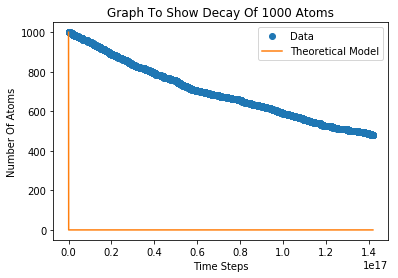

In [21]:
# Choose the name of the model from the options above.
# The model name must match exactly, including the capitals

theoreticalModel = LinearDecay
# Set your half life in seconds
HalfLife=100

plt.figure(1)
plt.title('Graph To Show Decay Of ' + str(totalNumberOfAtoms) + ' Atoms')
plt.xlabel('Time Steps')
plt.ylabel('Number Of Atoms')


plt.plot(timeStepArray, numberOfUndecayedAtomsArray,'o',label='Data')

plt.plot(timeStepArray,theoreticalModel(timeStepArray,HalfLife),label='Theoretical Model')


plt.legend()
plt.show()

<font color="red">**Change the parameters of your model, and the type of model. Rerun the cell above to see whether you can get a better fit to the data.**</font>

<font color="red">**What happens if you change the parameters right at the top in sections 1 and 2 and rerun the experiment. Does your model still work?**</font>

## Section 7 - Making a better fit

In this section, we will see if we can get a best-fit value for our chose model, and see how it compares. The ```curve_fit``` function lets us find tbe best fit value for our data, but only if we give it a sensible model.

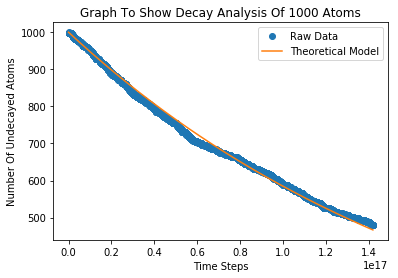

--------
Best fit Half Life for ExponentialDecay model:
  1.2905874760488293e+17 s
--------


In [22]:
plt.title('Graph To Show Decay Analysis Of ' + str(totalNumberOfAtoms) + ' Atoms')
plt.xlabel('Time Steps')
plt.ylabel('Number Of Undecayed Atoms')

# Chose a theoretical model as above
theoreticalModel = ExponentialDecay

# get the best-fit values
[bestfitHalfLife], pcov = curve_fit(theoreticalModel,timeStepArray, numberOfUndecayedAtomsArray,(1/decayConstant))
                    
plt.plot(timeStepArray, numberOfUndecayedAtomsArray, 'o', label = 'Raw Data')
plt.plot(timeStepArray, theoreticalModel(timeStepArray, bestfitHalfLife), label = 'Theoretical Model')

plt.legend(loc = 'best')
plt.show()
print('--------')
print('Best fit Half Life for {} model:\n  {} s'.format(theoreticalModel.__name__,bestfitHalfLife))
print('--------')

<font color="red">**How does that fit compare with the estimate you made above? Do you think the model you chose was good?**</font>

In [41]:
import numpy as np
Decay_constant = 3.84e-12 #Carbon-14
Half_life = np.log(2) / Decay_constant
Half_life_years = Half_life / (365 * 24 * 60 * 60)
print("The half life of Carbon-14 is " + str(Half_life_years) + " years")

The half life of Carbon-14 is 5723.841903564786 years
